<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Placement_predictor_Reg_%26_Classsification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.drop('sl_no', inplace = True, axis = 1)

In [5]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [7]:
df['salary'] = df['salary'].fillna(0)

In [8]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<Axes: ylabel='gender'>

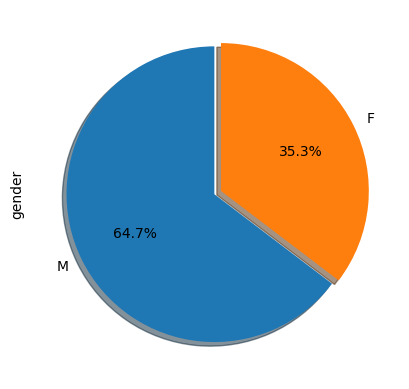

In [9]:
df['gender'].value_counts().plot.pie(explode = [0, 0.05], autopct = '%1.1f%%', shadow = True, startangle = 90)

Text(0.5, 0, 'School board')

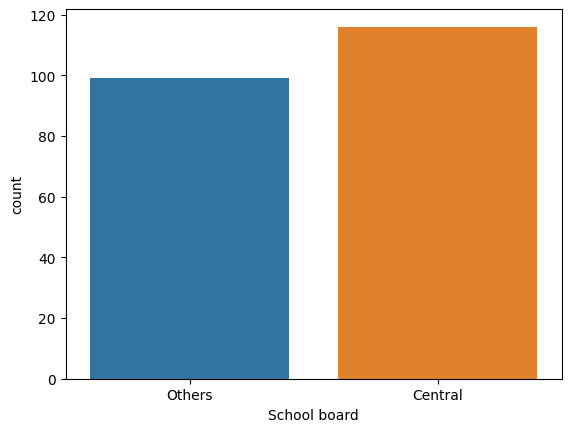

In [10]:
sns.countplot(x = df['ssc_b'])
plt.xlabel('School board')

Text(0.5, 0, 'High school board')

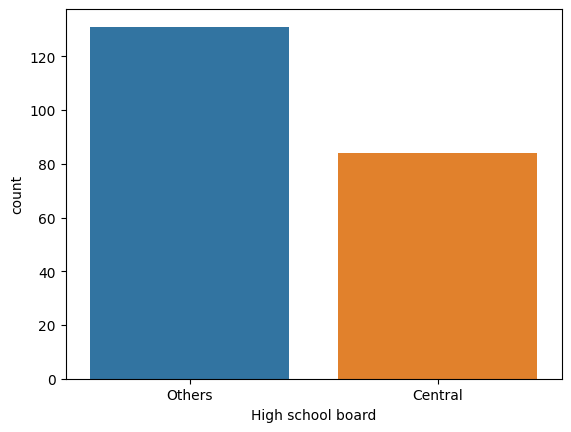

In [11]:
sns.countplot(x = df['hsc_b'])
plt.xlabel('High school board')

Text(0.5, 0, 'Courses')

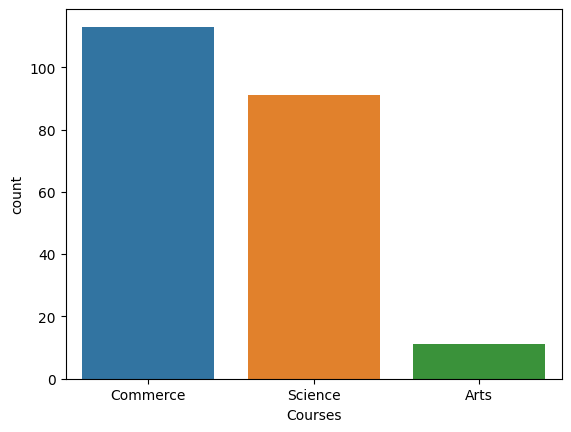

In [12]:
sns.countplot(x = df['hsc_s'])
plt.xlabel('Courses')

Text(0.5, 0, 'Degree college')

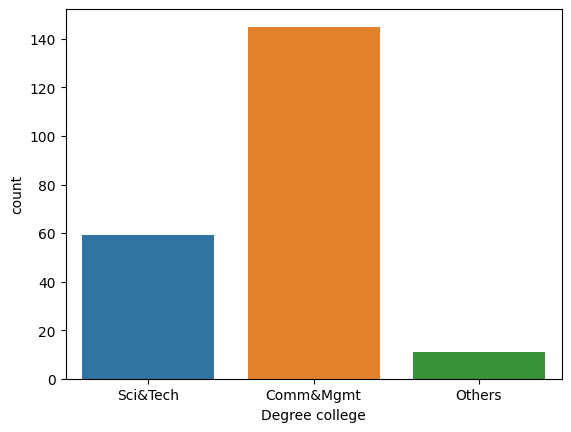

In [13]:
sns.countplot(x = df['degree_t'])
plt.xlabel('Degree college')

<Axes: ylabel='workex'>

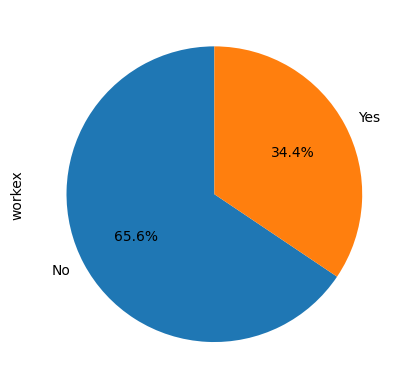

In [14]:
df['workex'].value_counts().plot.pie(autopct = '%1.1f%%', startangle = 90)

<Axes: xlabel='specialisation', ylabel='count'>

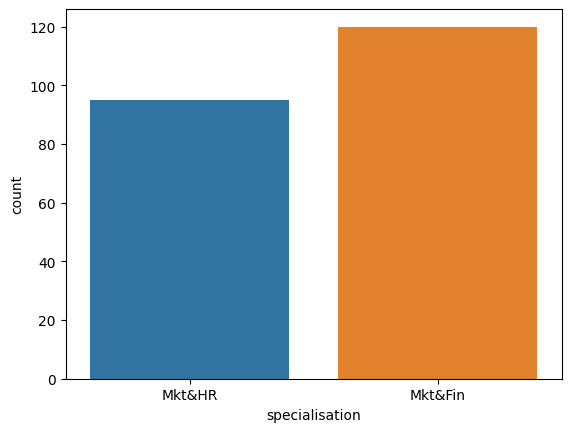

In [15]:
sns.countplot(x = df['specialisation'])

<Axes: ylabel='status'>

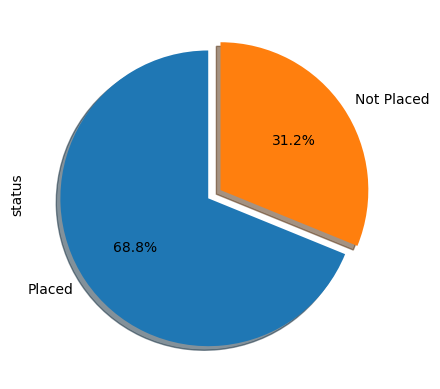

In [16]:
df['status'].value_counts().plot.pie(explode = [0.05, 0.05], autopct = '%1.1f%%', shadow = True, startangle = 90)

<Axes: xlabel='status', ylabel='count'>

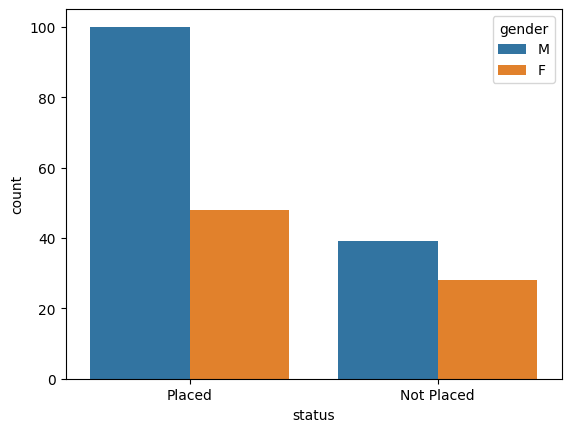

In [17]:
sns.countplot(x = df['status'], hue = df['gender'])

<Axes: xlabel='salary', ylabel='Count'>

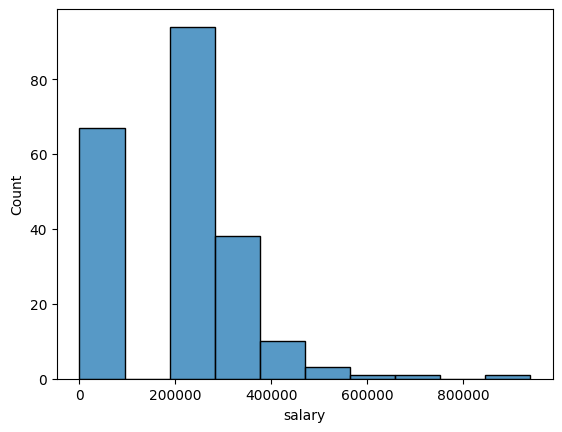

In [18]:
sns.histplot(x = df['salary'])

In [19]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [20]:
col = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in col:
    df[col] = le.fit_transform(df[col])

In [22]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


<Axes: >

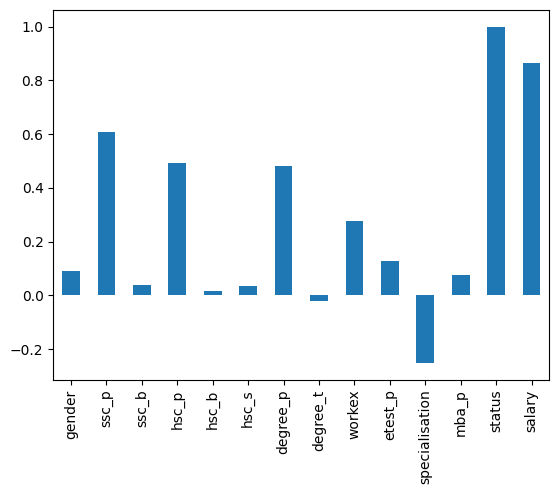

In [23]:
df.corr()['status'].plot.bar()

<Axes: >

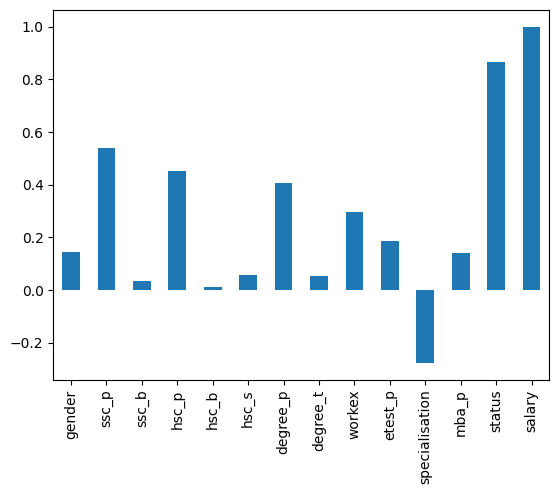

In [24]:
df.corr()['salary'].plot.bar()

In [25]:
X = df.drop('salary', axis = 1)
y = df['salary']

In [26]:
X1 = df.drop('status', axis = 1)
y1 = df['status']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3)

In [28]:
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

# Regression to predict Salary

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

72.21679454456377

<Axes: xlabel='salary'>

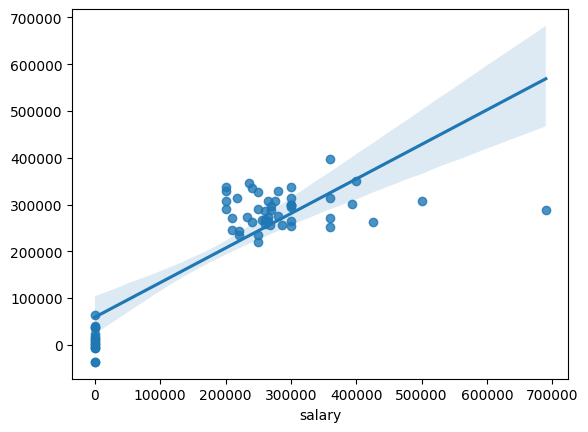

In [30]:
sns.regplot(x = y_test, y = y_pred)

In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

57.291789951934206

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

68.94838565449682

In [33]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)*100

62.06829521714965

#Classification to predict will student got placed.

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
accuracy_score(y1_test, y1_pred)*100
confusion_matrix(y1_test, y1_pred)

array([[22,  0],
       [ 0, 43]])

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
accuracy_score(y1_test, y1_pred)*100
confusion_matrix(y1_test, y1_pred)

array([[22,  0],
       [ 0, 43]])

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
accuracy_score(y1_test, y1_pred)*100
confusion_matrix(y1_test, y1_pred)

array([[22,  0],
       [ 0, 43]])

In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
accuracy_score(y1_test, y1_pred)*100
confusion_matrix(y1_test, y1_pred)

array([[22,  0],
       [ 0, 43]])